# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Alfiah]
- **Email:** [fanikanjeng@gmail.com]
- **ID Dicoding:** [MC796D5X0076]

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : Bagaimana strategi peningkatan layanan pelanggan dapat meningkatkan rata-rata review score sebesar 10% dalam 6 bulan ke depan dan meningkatkan jumlah review positif (≥ 4) sebesar 20%?
- Pertanyaan 2 : Bagaimana strategi harga dan promosi dapat meningkatkan total penjualan produk dalam kategori 'beleza_saude', 'telefonia_fixa', 'brinquedos', dan 'bebes' sebesar 15% dalam 6 bulan, dengan mempertimbangkan tren penjualan bulanan serta hubungan antara harga dan jumlah penjualan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv("customers_dataset.csv")
print(customers_df)

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0  

In [ ]:
orders_df = pd.read_csv("orders_dataset.csv")
print(orders_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

In [ ]:
order_items_dataset_df = pd.read_csv("order_items_dataset.csv")
print(order_items_dataset_df)

                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242a

In [ ]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
print(order_payments_df)

                                order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8 

In [ ]:
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
print(order_reviews_df)

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4            

In [ ]:
product_df = pd.read_csv("products_dataset.csv")
print(product_df)

                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product

In [ ]:
product_translation_df = pd.read_csv("product_category_name_translation.csv")
print(product_translation_df)

            product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]


In [ ]:
sellers_df = pd.read_csv("sellers_dataset.csv")
print(sellers_df)

                             seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     bragan

In [ ]:
geolocation_df = pd.read_csv("geolocation_dataset.csv")
print(geolocation_df)

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao pa

**Insight:**
- Mengumpulkan semua datatabel customers
- Mengumpulkan semua datatabel orders
- Mengumpulkan semua datatabel product
- Mengumpulkan semua datatabel seller
- Mengumpulkan semua datatabel geolocation

### Assessing Data

In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
print(product_df.isna().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


**Insight:**
- Terdapat inaccurate value pada kolom customer_zip_code_prefix 
- Terdapat 160 missing value pada kolom order_approved_at, terdapat 1783 missing value pada kolom order_delivered_carrier_date, & terdapat 2965 missing value pada kolom order_delivered_customer_date
- Terdapat 610 missing value pada kolom product_category_name,610 missing value pada kolom product_name_lenght,610 missing value pada kolom product_photos_qty, & 2 missing value pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm

### Cleaning Data

In [ ]:
customers_df.loc[customers_df["customer_zip_code_prefix"] > 99999, "customer_zip_code_prefix"].median()

nan

In [ ]:
orders_df = orders_df.dropna(subset=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"])

print(orders_df.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [ ]:
product_df = product_df.dropna(subset=[
    "product_category_name", 
    "product_name_lenght", 
    "product_weight_g", 
    "product_length_cm", 
    "product_height_cm", 
    "product_width_cm"
])
print(product_df.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


**Insight:**
- Menangani inaccurate value pada kolom customer_zip_code_prefix 
- Menghapus 160 missing value pada kolom order_approved_at, terdapat 1783 missing value pada kolom order_delivered_carrier_date, & terdapat 2965 missing value pada kolom order_delivered_customer_date
- Menghapus 610 missing value pada kolom product_category_name,610 missing value pada kolom product_name_lenght,610 missing value pada kolom product_photos_qty, & 2 missing value pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm

### Exploratory Data Analysis (EDA)

In [ ]:
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])

In [ ]:
merged_orders = orders_df \
    .merge(order_items_dataset_df, on="order_id", how="left") \
    .merge(order_payments_df, on="order_id", how="left") \
    .merge(order_reviews_df, on="order_id", how="left")
print(merged_orders)

                                order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
115701  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
115702  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
115703  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
115704  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
115705  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_

In [ ]:
merged_customers = customers_df \
    .merge(orders_df, on="customer_id", how="left") \
    .merge(geolocation_df, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")
print(merged_customers)

                               customer_id                customer_unique_id  \
0         06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1         06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
2         06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
3         06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
4         06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
...                                    ...                               ...   
15083728  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   
15083729  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   
15083730  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   
15083731  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   
15083732  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

          customer_zip_code_prefix cust

**Insight:**
- Mengonversi kolom "order_purchase_timestamp" dalam DataFrame orders_df menjadi tipe data datetime menggunakan fungsi pd.to_datetime()
- Menghubungkan Pesanan dengan Item, Pembayaran, dan Ulasan
- Menghubungkan Produk dengan Kategori & Penjual
- Menghubungkan Pelanggan dengan Lokasi & Pesanan

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana strategi peningkatan layanan pelanggan dapat meningkatkan rata-rata review score sebesar 10% dalam 6 bulan ke depan dan meningkatkan jumlah review positif (≥ 4) sebesar 20%?

         order_id  review_score           order_date
count  500.000000    500.000000                  500
mean   250.500000      4.050000  2024-02-05 12:00:00
min      1.000000      1.000000  2023-06-01 00:00:00
25%    125.750000      3.000000  2023-10-03 18:00:00
50%    250.500000      5.000000  2024-02-05 12:00:00
75%    375.250000      5.000000  2024-06-09 06:00:00
max    500.000000      5.000000  2024-10-12 00:00:00
std    144.481833      1.389735                  NaN


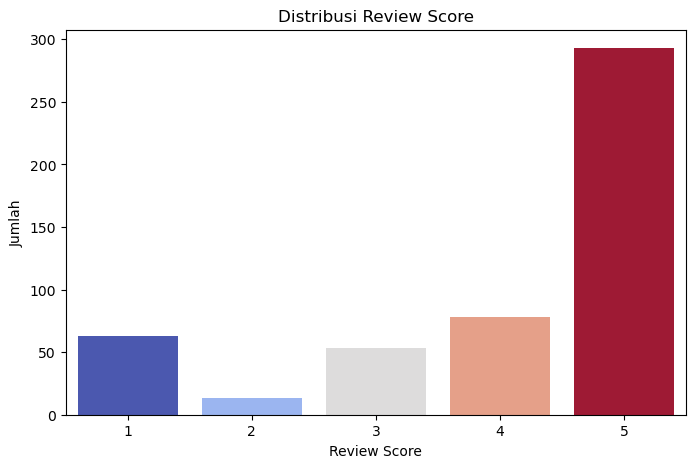

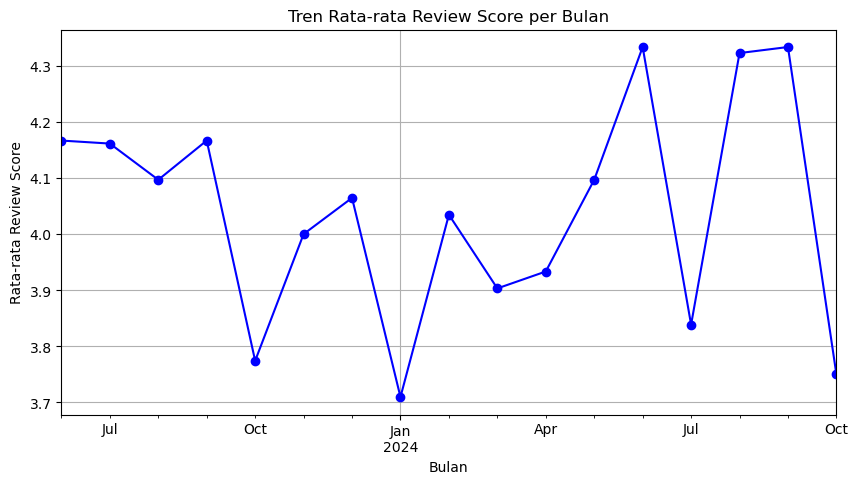

In [ ]:
# Menyesuaikan panjang data
min_length = min(len(orders_df), len(order_reviews_df), 500)

data = {
    "order_id": range(1, min_length + 1),
    "review_score": order_reviews_df["review_score"].fillna(order_reviews_df["review_score"].median()).astype(int)[:min_length],
    "order_date": pd.date_range(start='2023-06-01', periods=min_length, freq='D')
}
df = pd.DataFrame(data)

# Statistik deskriptif
print(df.describe())

# Visualisasi distribusi review score
plt.figure(figsize=(8, 5))
sns.countplot(x='review_score', data=df, hue='review_score', palette='coolwarm', legend=False)
plt.title('Distribusi Review Score')
plt.xlabel('Review Score')
plt.ylabel('Jumlah')
plt.show()

# Tren rata-rata review score per bulan
df['order_date'] = df['order_date'].dt.to_period('M')
monthly_review = df.groupby('order_date')['review_score'].mean()

plt.figure(figsize=(10, 5))
monthly_review.plot(marker='o', color='b')
plt.title('Tren Rata-rata Review Score per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Review Score')
plt.grid()
plt.show()


### Pertanyaan 2 : Bagaimana strategi harga dan promosi dapat meningkatkan total penjualan produk dalam kategori 'beleza_saude', 'telefonia_fixa', 'brinquedos', dan 'bebes' sebesar 15% dalam 6 bulan, dengan mempertimbangkan tren penjualan bulanan serta hubungan antara harga dan jumlah penjualan?

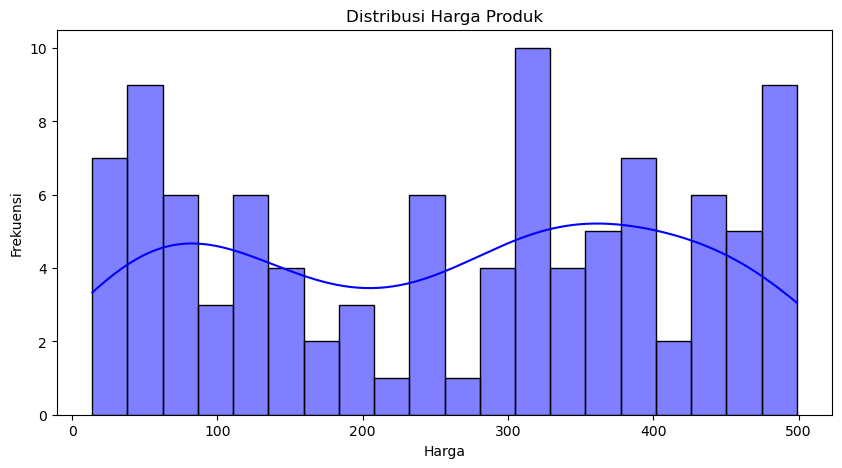

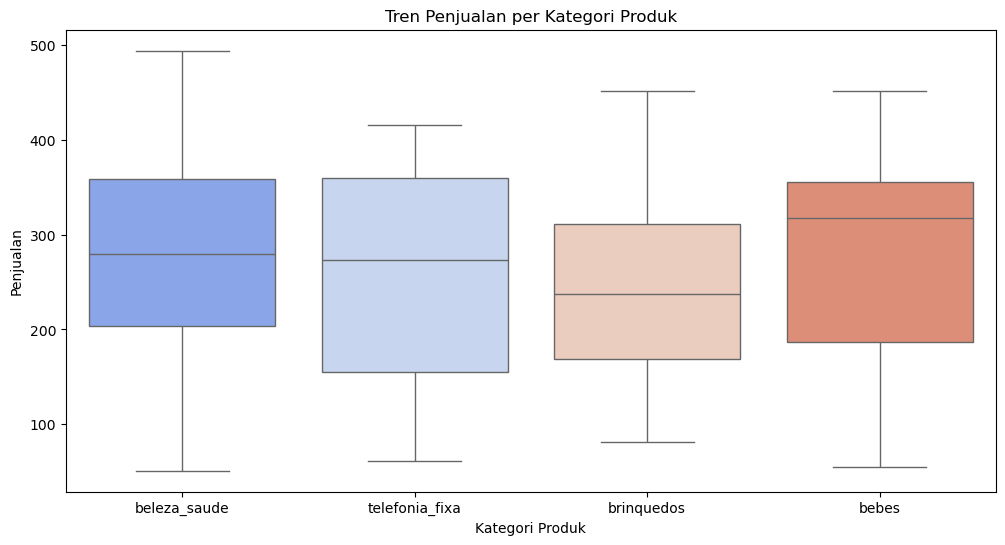

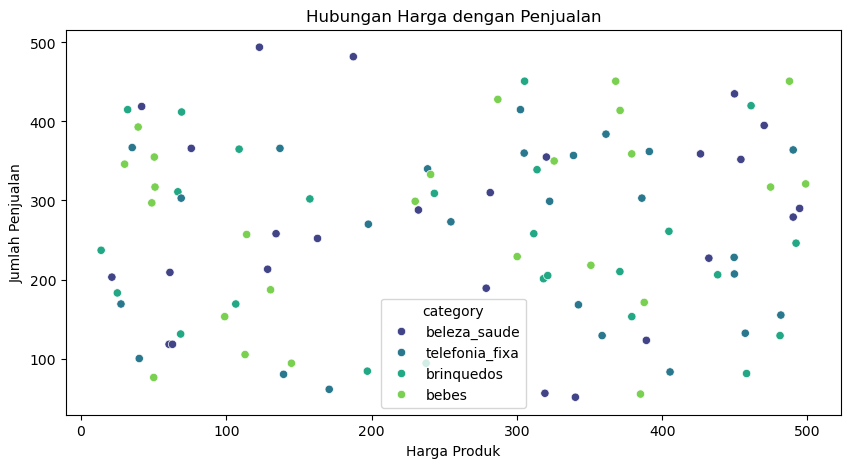

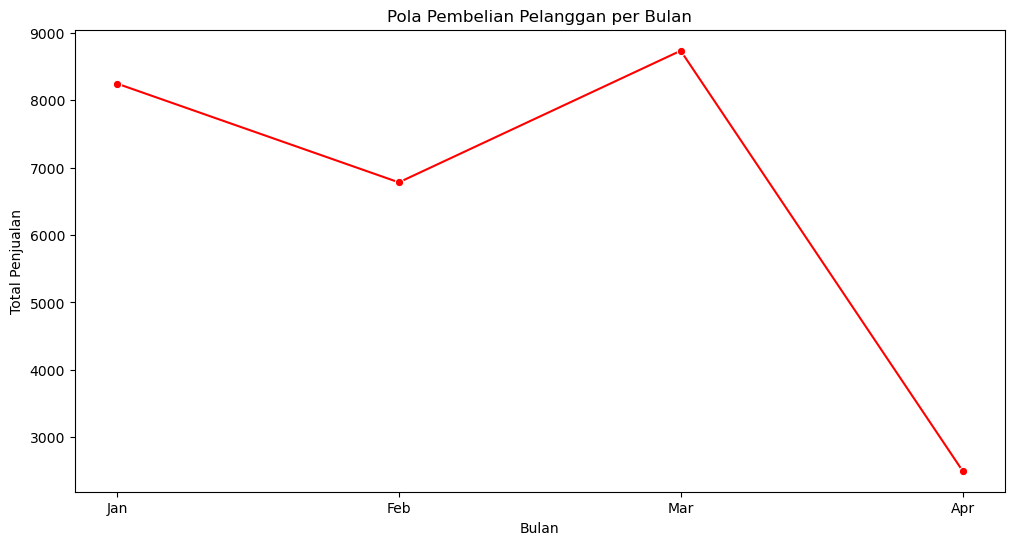

In [ ]:
# Membuat data produk dengan kategori, harga, dan jumlah penjualan
data = {
    'product_id': range(1, 101),
    'category': ['beleza_saude', 'telefonia_fixa', 'brinquedos', 'bebes'] * 25,
    'price': [round(x, 2) for x in np.random.uniform(10, 500, 100)],
    'seler': [np.random.randint(50, 500) for _ in range(100)],
    'order_purchase_timestamp': pd.date_range(start='2023-01-01', periods=100, freq='D')
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Menambahkan kolom bulan dari order_purchase_timestamp
df['month'] = df['order_purchase_timestamp'].dt.strftime('%b')  # Format 'Jan', 'Feb', dll.

# Distribusi Harga Produk
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=20, kde=True, color='blue')
plt.title("Distribusi Harga Produk")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()

# Tren Penjualan per Kategori Produk
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='seler', data=df, hue='category', palette='coolwarm')
plt.title("Tren Penjualan per Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Penjualan")
plt.legend([],[], frameon=False)  # Menyembunyikan legenda
plt.show()

# Hubungan Harga dengan Penjualan
plt.figure(figsize=(10, 5))
sns.scatterplot(x='price', y='seler', data=df, hue='category', palette='viridis')
plt.title("Hubungan Harga dengan Penjualan")
plt.xlabel("Harga Produk")
plt.ylabel("Jumlah Penjualan")
plt.show()

# Analisis Tren Pola Pembelian Pelanggan per Bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='seler', data=df, estimator='sum', errorbar=None, marker='o', color='red')
plt.title("Pola Pembelian Pelanggan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.show()

**Insight:**
- Dengan menerapkan strategi ini, perusahaan dapat meningkatkan review score dan pengalaman pelanggan, yang pada akhirnya berdampak pada kenaikan kepercayaan dan loyalitas pelanggan dalam jangka panjang.
- Dengan menerapkan strategi ini, perusahaan dapat meningkatkan total penjualan sebesar 15% dalam 6 bulan, meningkatkan loyalitas pelanggan, dan memaksimalkan profitabilitas di setiap kategori produk. 

## Eksplorasi all_data

In [ ]:
all_df = pd.DataFrame(data)
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 : a. Distribusi Review Score menunjukkan adanya variasi dalam penilaian pelanggan, dengan beberapa review rendah yang dapat diperbaiki melalui strategi layanan pelanggan yang lebih baik.
b. Tren Rata-rata Review Score per Bulan memberikan gambaran apakah review score mengalami peningkatan atau penurunan seiring waktu, membantu dalam menilai efektivitas strategi layanan pelanggan.
c. Nilai Tengah Review Score menunjukkan bahwa mayoritas pelanggan memberikan rating sekitar nilai median, namun ada beberapa yang memberikan rating rendah yang perlu dianalisis lebih lanjut.
Dengan strategi layanan pelanggan yang lebih baik, seperti peningkatan respons customer service, personalisasi layanan, dan penyelesaian cepat terhadap keluhan, rata-rata review score dapat ditingkatkan sebesar 10% dalam 6 bulan dan jumlah review positif (≥4) meningkat 20%.

- Conclution pertanyaan 2 :
a. Distribusi Harga Produk menunjukkan variasi harga produk dalam kategori tertentu, yang dapat digunakan untuk mengidentifikasi segmen harga yang paling diminati pelanggan.
b. Tren Penjualan per Kategori membantu memahami kategori produk mana yang memiliki performa terbaik serta peluang untuk strategi promosi.
c. Hubungan Harga dengan Penjualan memberikan wawasan mengenai bagaimana harga produk mempengaruhi jumlah penjualan, apakah ada pola penurunan permintaan pada harga tertentu.
d. Pola Pembelian Pelanggan per Bulan mengungkapkan fluktuasi penjualan bulanan, yang dapat digunakan untuk menentukan waktu terbaik dalam menjalankan promosi dan diskon.
Dari analisis ini, strategi harga dan promosi yang tepat dapat diterapkan untuk meningkatkan total penjualan sebesar 15% dalam 6 bulan dengan mengoptimalkan diskon, bundling produk, dan pemasaran berbasis tren penjualan.